In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, IBMQ, BasicAer, compile
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import random, math

In [3]:
def pick_a_value(n):
    """ This function will return the a value that is less than N,
    where the greatest common denominator is 1"""
    while True:
        x = random.randint(1,n)
        if math.gcd(x,n) == 1:
            a = x
            break
    return a

In [21]:
def n_bit_qft(circuit, arg_reg, n):
    """Perform quantum fourier transform on quantum circuit"""
#     circuit = QuantumCircuit(q, c)
    for k in range(n):
        j = n - k
        circuit.h(arg_reg[j - 1])
        for i in reversed(range(j-1)):
            circuit.cu1(2*math.pi/2**(j-1), arg_reg[i], arg_reg[j-1])
            
    for i in range(n//2):
        circuit.swap(arg_reg[i], arg_reg[n-i-1])

In [5]:
def check_r_value(n, r, a):
    """This function will check to see if R is even and that
    a to the r/2 + 1 is not equal to 0 mod N"""
    if r%2 != 0:
        return False
    elif (a**(r/2)+ 1)%n == 0:
        return False
    else:
        return True

In [6]:
def get_gcd_for_a(n, r, a):
    """This function will find p given by gcd(a^(r/2)-1, N)"""
    p = math.gcd(int(a**(r/2)-1), n)
    return p

In [18]:
"""Set initial superposition of argument register"""
def set_uniform_superposition(circuit, arg_reg, t):
    for i in range(t):
        circuit.h(arg_reg[i])


In [ ]:
"""Apply modular exponentiation a^x mod N to the function register of Quantum circuit"""
def apply_modular_exponentiation(shor, funct_reg, n):

In [33]:
"""Take measurements on quantum circuit"""
def measure_quantum_circuit(shor, num_bits):
    for i in range(num_bits):
        shor.measure(argument_register[i], function_register[i])

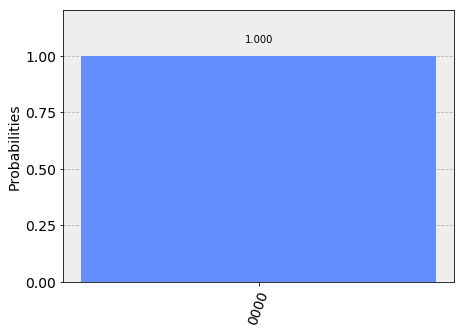

In [30]:
"""main driver section"""
N = 15                        # number to be factored
T = 256                       # choose number of qubits for registers (T = 2^t and N^2 <= T <= 2N^2)
n = math.ceil(math.log(N, 2)) # enough bits to hold value N
t = 2*n                       # t = 2*n

# create registers for estimating phase
argument_register = QuantumRegister(t, 'q')
function_register = ClassicalRegister(n, 'q')
shor = QuantumCircuit(argument_register, function_register)

set_uniform_superposition(shor, argument_register, t)
apply_modular_exponentiation(shor, function_register, n) # TODO(implement)
n_bit_qft(shor, argument_register, t)
print(shor)

measure_quantum_circuit(shor, n)

# run job on the simulation
sim_job = execute(
    [shor], 
    backend=BasicAer.get_backend('qasm_simulator'),
    shots=1000
)
# output results
sim_data = sim_job.result().get_counts(shor)
plot_histogram(sim_data)



In [43]:
while True:
    a = pick_a_value(N)      # select a value of a that is coprime to n
    r = 4                    # find period r using quantum simulation
    if check_r_value(N,r,a): # evaluate that period r is valid
        break

p = get_gcd_for_a(N,r,a) # find p given using a, n and the period
print(p)

3
